In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 83807298.41it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19550628.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24995451.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23548243.22it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



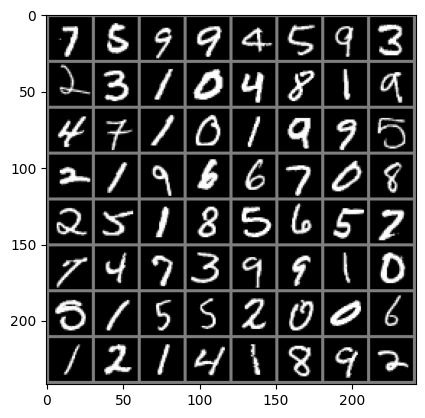

Labels: tensor([7, 5, 9, 9, 4, 5, 9, 3, 2, 3, 1, 0, 4, 8, 1, 9, 4, 7, 1, 0, 1, 9, 9, 5,
        2, 1, 9, 6, 6, 7, 0, 8, 2, 5, 1, 8, 5, 6, 5, 7, 7, 4, 7, 3, 9, 9, 1, 0,
        5, 1, 5, 5, 2, 0, 0, 6, 1, 2, 1, 4, 1, 8, 9, 2])


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model = SimpleNN()


In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.5834
Epoch [2/10], Loss: 1.5801
Epoch [3/10], Loss: 1.4627
Epoch [4/10], Loss: 1.5260
Epoch [5/10], Loss: 1.4662
Epoch [6/10], Loss: 1.5564
Epoch [7/10], Loss: 1.5681
Epoch [8/10], Loss: 1.5211
Epoch [9/10], Loss: 1.4924
Epoch [10/10], Loss: 1.4647
Training Finished


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9667
F1 Score: 0.9667
Precision: 0.9670
Recall: 0.9667
Confusion Matrix:
 [[ 969    0    1    3    0    2    1    2    2    0]
 [   0 1124    2    3    0    1    3    1    1    0]
 [   8    4  983   10    6    1    3    7   10    0]
 [   0    0    1  992    0    2    1    6    4    4]
 [   1    0    3    0  956    0    5    1    2   14]
 [   3    0    0   15    0  860    7    1    3    3]
 [  12    2    0    2    3    9  925    1    4    0]
 [   3   15    7    8    4    0    0  975    3   13]
 [   5    2    0   19    4    7    3    3  928    3]
 [   6    4    0   13   16    6    1    3    5  955]]


##Deskripsi dan Penjelasan hasil
Model Neural Network yang digunakan adalah 'SimpleNN'. Terdiri dari dua lapisan yang sepenuhnya terhubung dengan aktivasi ReLU dan lapisan output softmax. Ukuran input diubah menjadi 28x28 (ukuran gambar MNIST), dan output memiliki 10 kelas (digit 0-9). Didapatkan hasil evaluasi model dengan nilai akurasi, recall, precision, dan F1 Score 96%.